<h1 style="text-align: center; font-size: 1000%; text-decoration: underline;">Lab 7</h1>
<h2 style="text-align: center; font-size: 250%;">Ido Israeli (ID - 212432439)<br>Jonathan Derhy (ID - 315856377)</h2>

In [29]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

<h3>Loading Train Data and Classifications</h3>

<h4>Loading Xtrain Data</h4>

In [30]:
Xtrain = np.loadtxt('.\External\Data\Xtrain.txt', delimiter=',', skiprows=0)
Xtrain

array([[ 1.52302986, -0.23415337],
       [-0.23413696,  1.57921282],
       [ 0.76743473, -0.46947439],
       ...,
       [ 0.86376409,  0.88236255],
       [ 2.48053741,  2.31694986],
       [ 1.53583313,  0.95806521]])

<h4>Loading Ytrain Classifications</h4>

In [31]:
Ytrain = np.loadtxt('.\External\Classifications\Ytrain.txt', delimiter=',', skiprows=0)
Ytrain

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<h3>Loading Test Data and Classifications</h3>

<h4>Loading Xtest Data</h4>

In [32]:
Xtest = np.loadtxt('.\External\Data\Xtest.txt', delimiter=',', skiprows=0)
Xtest

array([[-0.79919201, -0.48274352],
       [-0.95332861,  0.12267032],
       [ 1.62467846,  0.32307927],
       [-0.2523535 , -0.29181127],
       [-1.56319081,  0.88310978],
       [-0.0778372 , -0.18047991],
       [ 3.19310757,  0.29875291],
       [-0.75179105, -0.4263576 ],
       [ 1.14844571,  0.11327041],
       [-1.43827798,  0.91922893],
       [-0.66814409,  1.87329778],
       [ 1.08004807, -0.4473219 ],
       [ 1.28101636,  0.06785551],
       [ 0.85277368,  0.48473282],
       [-0.84635665, -0.64354983],
       [ 1.02996082, -0.33477533],
       [-0.40364846, -0.95512258],
       [ 0.42359907,  2.06252492],
       [-1.06753291,  0.02421946],
       [ 1.41222056, -0.07964139],
       [ 0.4523718 , -1.06239353],
       [ 0.4283071 , -0.18714427],
       [ 0.98573   ,  1.18738605],
       [ 2.58956364,  0.57963317],
       [ 0.32579632,  0.1943843 ],
       [-0.35316629,  0.33848384],
       [-0.29540141,  0.16846098],
       [ 1.31759754, -1.00654257],
       [ 1.13987856,

<h4>Loading Ytest Classifications</h4>

In [33]:
Ytest = np.loadtxt('.\External\Classifications\Ytest.txt', delimiter=',', skiprows=0)
Ytest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<h3>Loading and Extracting Coefficiants</h3>

<h4>Loading Coefficiants into a Dataframe</h4>

In [34]:
df = pd.read_csv('.\External\Coefficients\Coefficients.txt', sep=",", header=None, names=["m", "w0", "w1", "w2"], skiprows=1)
df

,m,w0,w1,w2
0,0,-0.307962,-1.893615,0.213294
1,1,-0.283479,-1.786899,0.307090
2,2,-0.260025,-1.681910,0.398256
3,3,-0.237881,-1.579190,0.486146
4,4,-0.217375,-1.479412,0.570001
...,...,...,...,...
296,296,-2.150542,1.105060,1.377854
297,297,-2.154112,1.106905,1.378751
298,298,-2.157672,1.108743,1.379647
299,299,-2.161221,1.110573,1.380544


<h4>Extracting m from the dataframe</h4>

In [35]:
m = df["m"].values
m

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<h4>Extracting W from the dataframe</h4>

In [36]:
W = df[df.columns[1:]].values
W

array([[-0.30796153, -1.89361467,  0.21329371],
       [-0.28347861, -1.78689939,  0.30709037],
       [-0.26002467, -1.68190956,  0.39825553],
       [-0.23788114, -1.57919044,  0.48614553],
       [-0.21737547, -1.47941225,  0.57000064],
       [-0.19886065, -1.38334534,  0.64899173],
       [-0.18267653, -1.29179214,  0.72231667],
       [-0.16909817, -1.20547835,  0.78933311],
       [-0.15828817, -1.12493347,  0.84968107],
       [-0.15027247, -1.05040816,  0.90334046],
       [-0.14494845, -0.98186033,  0.95060303],
       [-0.14211779, -0.91900599,  0.99198303],
       [-0.14152818, -0.86140371,  1.02811011],
       [-0.14290999, -0.80853855,  1.05963935],
       [-0.14600167, -0.75988537,  1.08719238],
       [-0.1505637 , -0.71494759,  1.11132743],
       [-0.15638429, -0.67327623,  1.13252957],
       [-0.16328002, -0.63447596,  1.15121234],
       [-0.17109382, -0.59820402,  1.16772485],
       [-0.17969197, -0.56416557,  1.18236057],
       [-0.1889608 , -0.53210789,  1.195

<h3>Functions</h3>

<h4>Classifier Functions</h4>

In [37]:
# 
def probabilisticLogRegClassifier(W, X):
    """
    This Function
    """
    return 1/(1+np.exp(-(X@W[1:] + W[0])))

# 
def probabilisticLogRegClassifierForMatrix(W, X):
    """
    This Function
    """
    Y = []
    for x in X:
        Y.append(probabilisticLogRegClassifier(W, x))
    return np.array(Y)

# 
def finalClassification(prb_Ypredicted_equals_one, th):
    if th > 1 or th < 0:
        print("th should be 0<=th<=1")
        return
    Y = []
    for prb_y_is_one in prb_Ypredicted_equals_one:
        Y.append(1.0 if prb_y_is_one >= th else 0.0)
    return np.array(Y)

<h4>Accuracy Functions</h4>

In [38]:
# 
def accuracy(actualY, predictedY):
    """
    This Function
    """
    return 100*(predictedY == actualY).mean()

# 
def printAccuracy(actualY, predictedY):
    """
    This Function
    """
    print(f'{accuracy(actualY, predictedY)}%')
    return

# 
def accuracyPerIteration(m, X, Y, W, th):
    accuracies = []
    for specific_m, _ in enumerate(m):
        accuracies.append(accuracy(Y, finalClassification(probabilisticLogRegClassifierForMatrix(W[specific_m], X), th)))
    return accuracies

# 
def drawAccuracyGraph(iterations, accuracies):
    f = plt.figure()
    f.set_figwidth(14)
    f.set_figheight(8)
    plt.plot(iterations, accuracies, 'blue', marker='o', markersize = 3)
    plt.xlabel('m')
    plt.ylabel('Accuracy')
    plt.title("Accuracy Graph of Iteration m")
    return

<h4>Confusion Matrix Functions</h4>

In [39]:
# 
def confusionMatrix(actualY, predictedY):
    confusion_matrix = np.zeros([2, 2])
    values = [0, 1]
    for actual in values:
        for pred in values:
            confusion_matrix[actual, pred] = ((actualY == actual)*(predictedY == pred)).sum()
    return confusion_matrix

# 
def confusionMatrixWithThreshold(W, X, Y, th):
    final_classification = finalClassification(probabilisticLogRegClassifier(W, X), th)
    return confusionMatrix(Y, final_classification)

# 
def confusionMatrixPerIteration(m, X, Y, W, th):
    matrices = []
    for specific_m, _ in enumerate(m):
        matrices.append(confusionMatrixWithThreshold(W[specific_m], X, Y, 0.5))
    return matrices

# 
def turnConfusionMatrixIntoDataframe(matrix):
    indexes = [0, 1]
    df = pd.DataFrame(data = matrix, columns = indexes, index = indexes)
    return df

# 
def printConfusionMatrixPerIteration(m, X, Y, W, th):
    matrices = confusionMatrixPerIteration(m, X, Y, W, th)
    for idx, itr in enumerate(m):
        print(f'\nConfusion Matrix of iteration #{int(itr)} with th={th}')
        print(turnConfusionMatrixIntoDataframe(matrices[idx]))
    return

# 
def printConfusionMatrix(W, X, Y, th):
    confusion_matrix = confusionMatrixWithThreshold(W, X, Y, th)
    confusion_matrix = turnConfusionMatrixIntoDataframe(confusion_matrix)
    print(f'\nConfusion Matrix with th={th}\n{confusion_matrix}')
    return

<h4>Cross Entropy Functions</h4>

In [40]:
# 
def crossEntropy(Ydata, Yprob):
    logVect = np.vectorize(math.log)
    return -(Ydata*logVect(Yprob) + (1-Ydata)*logVect(1-Yprob)).sum()

# 
def crossEntropy_for_specific_m(specific_m, X, Y, W):
    Yprob = probabilisticLogRegClassifier(W[specific_m], X)
    return crossEntropy(Y, Yprob)

# 
def crossEntropy_for_every_m(m, X, Y, W):
    cross_entropy_vect = []
    for specific_m, _ in enumerate(m):
        cross_entropy_vect.append(crossEntropy_for_specific_m(specific_m, X, Y, W))
    return cross_entropy_vect

# 
def graph_crossEntropies(m, cross_entropies):
    f = plt.figure()
    f.set_figwidth(14)
    f.set_figheight(8)
    plt.plot(m, cross_entropies, 'blue', marker='o', markersize=3)
    plt.xlabel('m')
    plt.ylabel('Cross Entropy')
    plt.title("Cross Entropy Graph of Iteration m")
    return

<h4>ROC Functions</h4>

In [41]:
# 
def drawROC(actualY, prob_y_is_one, title):
    # Compute the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(actualY,  prob_y_is_one)
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve\n(area = %0.4f)' % roc_auc)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    return

<h4>General Printing\Drawing\Graphing Functions</h4>

In [42]:
# 
def printDataframeWithRegardsToIteration(m, metric, metricName):
    intItr = np.vectorize(int)
    new_m = np.array(intItr(m))
    new_metric = np.array(metric)
    table = [new_m, new_metric]
    df = pd.DataFrame(data = {'m':new_m, metricName: metric})
    print(df)
    return

<h3>Printing and Drawing Metrics for Train Data with every m</h3>

<h4>Confusion Matrix For Each Iteration m</h4>

In [43]:
# printConfusionMatrixPerIteration(m, Xtrain, Ytrain, W, 0.5)

<h4>Accuracy For Each Iteration m</h4>

       m  Accuracy
0      0    27.875
1      1    28.250
2      2    28.250
3      3    28.125
4      4    28.375
..   ...       ...
296  296    93.250
297  297    93.250
298  298    93.250
299  299    93.250
300  300    93.250

[301 rows x 2 columns]


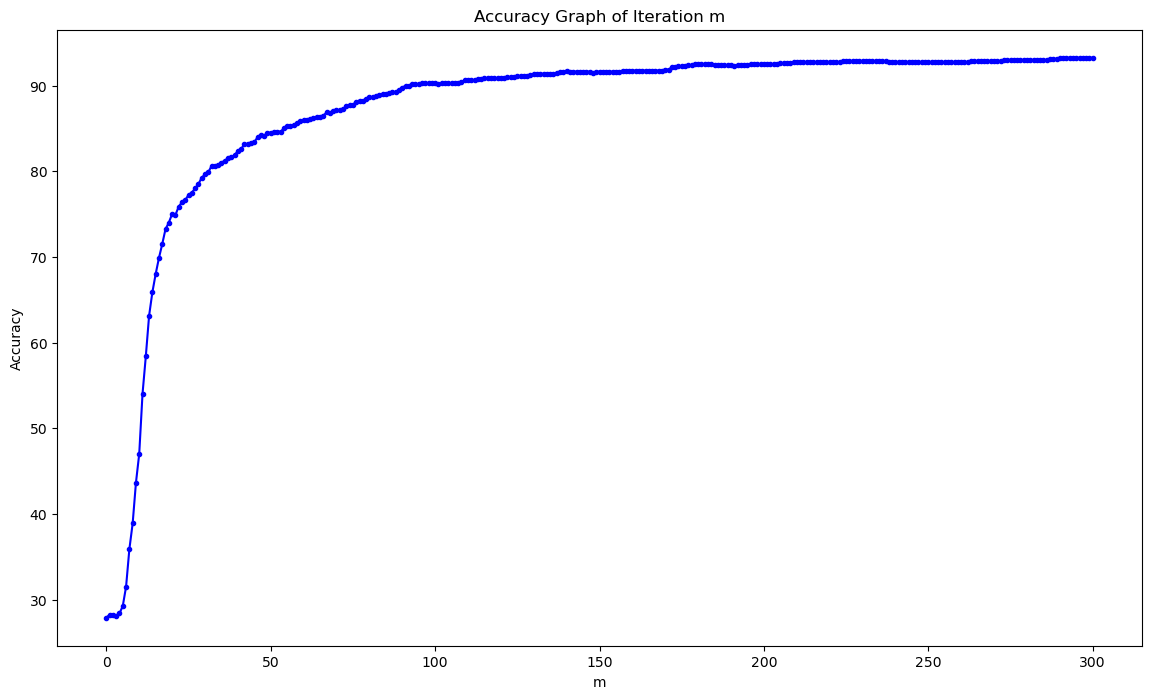

In [44]:
accuracyPerItr = accuracyPerIteration(m, Xtrain, Ytrain, W, 0.5)
printDataframeWithRegardsToIteration(m, accuracyPerItr, "Accuracy")
drawAccuracyGraph(m, accuracyPerItr)

The more iterations we make, the more accurate we get, as we fine tune our coefficients.

<h4>Cross Entropy For Each Iteration m</h4>

       m  Cross Entropy
0      0    1776.772367
1      1    1612.232700
2      2    1455.330530
3      3    1307.854072
4      4    1171.737142
..   ...            ...
296  296     161.132790
297  297     160.997354
298  298     160.862756
299  299     160.728988
300  300     160.596041

[301 rows x 2 columns]


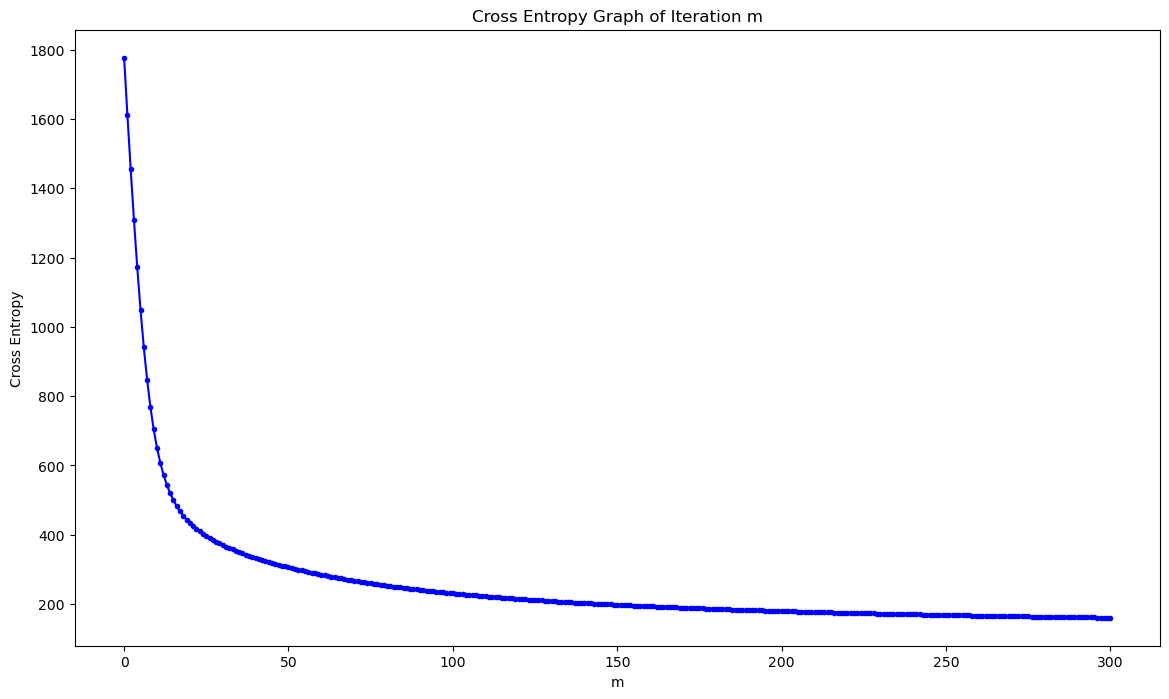

In [45]:
cross_entropies = crossEntropy_for_every_m(m, Xtrain, Ytrain, W)
printDataframeWithRegardsToIteration(m, cross_entropies, "Cross Entropy")
graph_crossEntropies(m, cross_entropies)

We may notice that the more drastic changes and calibrations occur early on, and rather quickly we reach a sort of a plateau, where the changes are minor and account for finer tuning of the weights.

<h3>Printing Metrics for Train Data with the largest m (m = 300)</h3>

In [46]:
idx_max_m = np.argmax(m)
print(f'The index of the largest m: {idx_max_m}')
max_m = int(m[idx_max_m])
print(f'The largest m: {max_m}')
new_m = [max_m]
w = [W[idx_max_m]]
th = 0.5

The index of the largest m: 300
The largest m: 300



Confusion Matrix of iteration #300 with th=0.5
       0      1
0  358.0   42.0
1   12.0  388.0


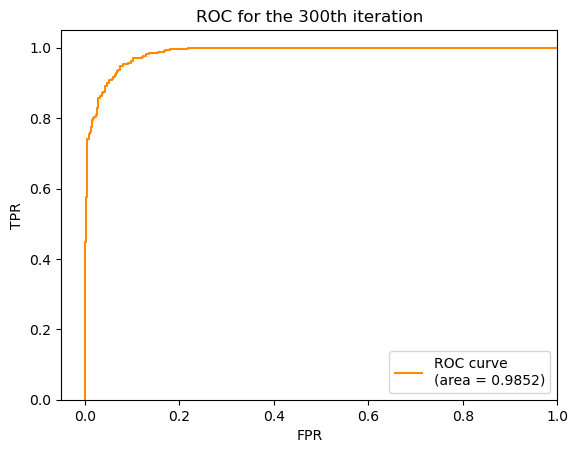

In [47]:
printConfusionMatrixPerIteration([max_m], Xtrain, Ytrain, w, th=0.5)
drawROC(Ytrain, probabilisticLogRegClassifier(w[0], Xtrain), f'ROC for the {max_m}th iteration')

<h4>Accuracy For the 300th iteration on Train Data</h4>

In [48]:
print(f'Accuracy for the {max_m}th iteration is {accuracyPerIteration(new_m, Xtrain, Ytrain, w, th)[0]}%')

Accuracy for the 300th iteration is 93.25%


<h4>Cross Entropy For the 300th iteration on Train Data</h4>

In [49]:
print(f'Cross Entropy for the {max_m}th iteration is {crossEntropy_for_every_m(new_m, Xtrain, Ytrain, w)[0]}')

Cross Entropy for the 300th iteration is 160.59604127295253


<h3>Printing and Drawing Metrics for Test Data with every m</h3>

<h4>Confusion Matrix For Each Iteration m</h4>

In [50]:
# printConfusionMatrixPerIteration(m, Xtest, Ytest, W, 0.5)

<h4>Accuracy For Each Iteration m</h4>

       m  Accuracy
0      0      29.5
1      1      29.5
2      2      29.0
3      3      29.0
4      4      30.0
..   ...       ...
296  296      94.0
297  297      94.0
298  298      94.0
299  299      94.0
300  300      94.0

[301 rows x 2 columns]


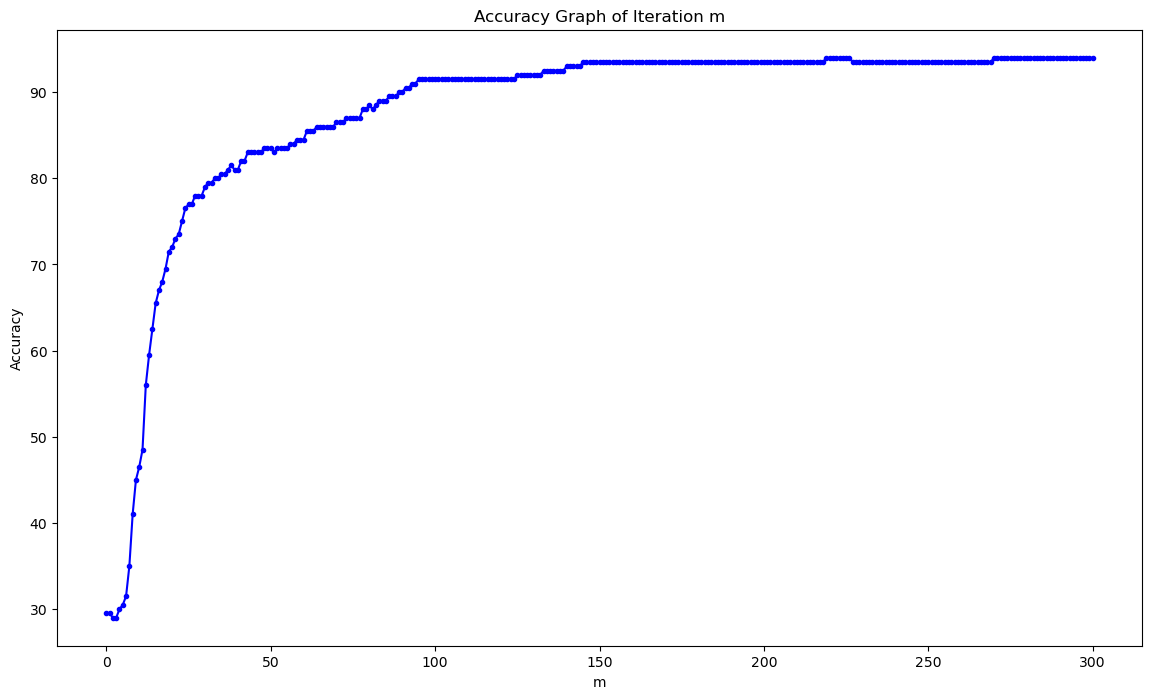

In [51]:
accuracyPerItr = accuracyPerIteration(m, Xtest, Ytest, W, 0.5)
printDataframeWithRegardsToIteration(m, accuracyPerItr, "Accuracy")
drawAccuracyGraph(m, accuracyPerItr)

The more iterations we make, the more accurate we get, as we fine tune our coefficients.

<h4>Cross Entropy For Each Iteration m</h4>

       m  Cross Entropy
0      0     446.945207
1      1     406.710450
2      2     368.277831
3      3     332.083397
4      4     298.598453
..   ...            ...
296  296      41.703460
297  297      41.665496
298  298      41.627755
299  299      41.590235
300  300      41.552932

[301 rows x 2 columns]


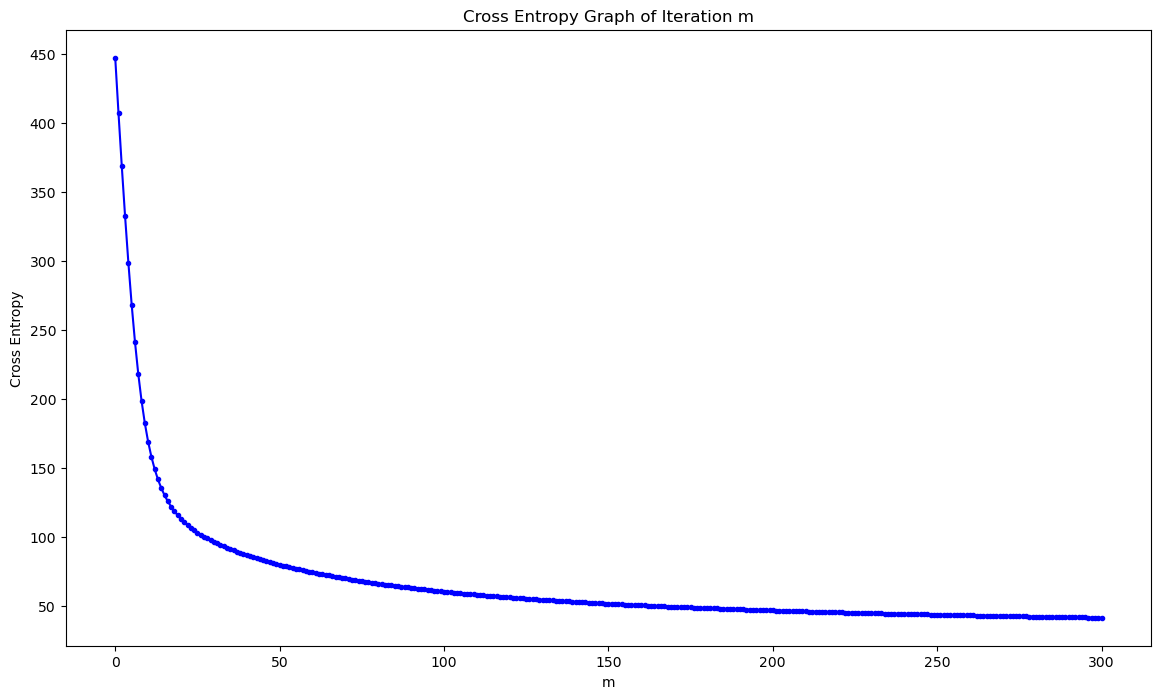

In [52]:
cross_entropies = crossEntropy_for_every_m(m, Xtest, Ytest, W)
printDataframeWithRegardsToIteration(m, cross_entropies, "Cross Entropy")
graph_crossEntropies(m, cross_entropies)

<h3>Printing Metrics for Test Data with the largest m (m = 300)</h3>

In [53]:
idx_max_m = np.argmax(m)
print(f'The index of the largest m: {idx_max_m}')
max_m = int(m[idx_max_m])
print(f'The largest m: {max_m}')
new_m = [max_m]
w = [W[idx_max_m]]
th = 0.5

The index of the largest m: 300
The largest m: 300


<h4>Confusion Matrix For the 300th iteration on Test Data</h4>


Confusion Matrix of iteration #300 with th=0.5
      0     1
0  90.0  10.0
1   2.0  98.0


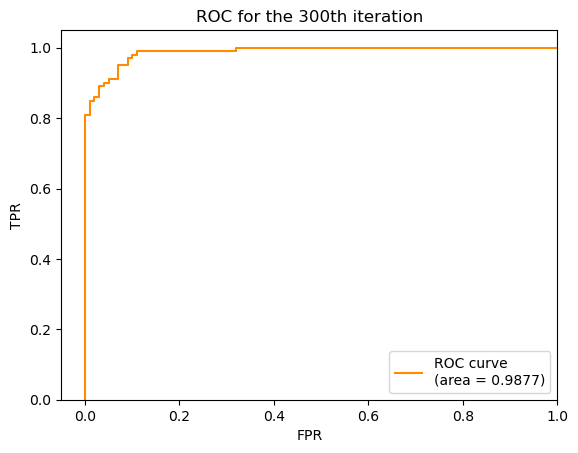

In [54]:
printConfusionMatrixPerIteration(new_m, Xtest, Ytest, w, th)
drawROC(Ytest, probabilisticLogRegClassifier(w[0], Xtest), f'ROC for the {max_m}th iteration')

<h4>Accuracy For the 300th iteration on Test Data</h4>

In [55]:
print(f'Accuracy for the {max_m}th iteration is {accuracyPerIteration(new_m, Xtest, Ytest, w, th)[0]}%')

Accuracy for the 300th iteration is 94.0%


<h4>Cross Entropy For the 300th iteration on Test Data</h4>

In [56]:
print(f'Cross Entropy for the {max_m}th iteration is {crossEntropy_for_every_m(new_m, Xtest, Ytest, w)[0]}')

Cross Entropy for the 300th iteration is 41.55293243513337
